In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import random
import matplotlib.pyplot as plt

# Load Dataset

## keras.io/api/optimizers

In [9]:
X_train = np.loadtxt('/content/input.csv', delimiter=',')
y_train = np.loadtxt('/content/labels.csv', delimiter=',')
X_test = np.loadtxt('/content/input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/labels_test.csv', delimiter=',')

In [15]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


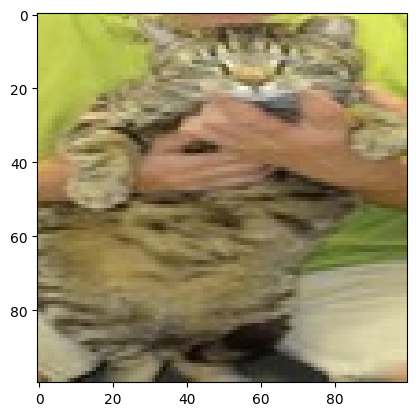

In [62]:
# X_train[1,:]
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [27]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3))),
model.add(MaxPooling2D((2,2))),

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5054 - loss: 0.7576
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 937ms/step - accuracy: 0.6479 - loss: 0.6542
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 951ms/step - accuracy: 0.6894 - loss: 0.5661
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 928ms/step - accuracy: 0.7349 - loss: 0.5181
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 918ms/step - accuracy: 0.8115 - loss: 0.4202


In [34]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 941ms/step - accuracy: 0.8575 - loss: 0.3560
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 924ms/step - accuracy: 0.8860 - loss: 0.3021
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 930ms/step - accuracy: 0.9231 - loss: 0.2206
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 904ms/step - accuracy: 0.9481 - loss: 0.1639
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 933ms/step - accuracy: 0.9564 - loss: 0.1296


In [36]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.6077 - loss: 1.1033


[0.9267907738685608, 0.6725000143051147]

# Make Predictions

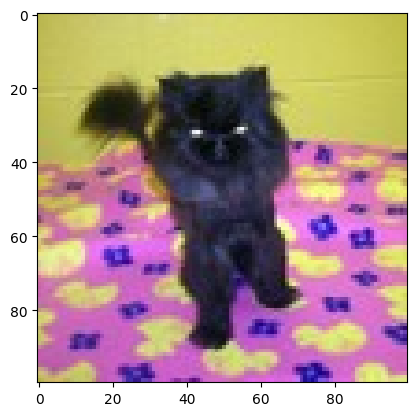

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction:  Cat


In [66]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'Dog'
elif(y_pred == 1):
  pred = 'Cat'

print("Prediction: ", pred)